<a href="https://colab.research.google.com/github/Waleed-Mujahid/DSA-Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logsitic Regression
In this notebook I will build a simple logistic regression model using sklearn. The dataset used is **Social_Network_Ads**. 

## Importing Dependencies
Firstly we import our dependencies

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Pandas DataFrame
Next we load our dataset into a Pandas dataframe

In [ ]:
#load Data_set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")

We can make use of df.head() and df.info() to look at our data.

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


So we have 400 examples. We have do not have any missing or invalid data. So we do not need to do any data manipulation.

Now we extract valuable infomation from the Pandas DataFrame

In [ ]:
X = df.drop(['User ID','Purchased'], axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Visualizing our Data
Now we make use of Seaborn library to Visualize our Data.

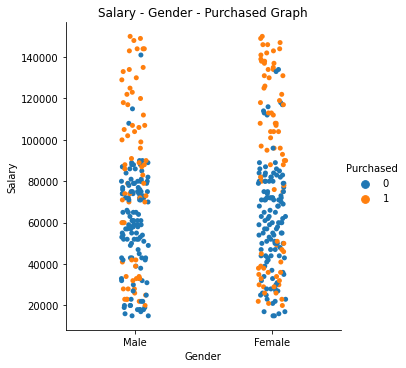

In [ ]:
import seaborn as sns
sns.catplot(y='EstimatedSalary', x = 'Gender' , data = df, hue = 'Purchased')
plt.title("Salary - Gender - Purchased Graph")
plt.ylabel("Salary")
plt.show()

As **Gender** is a categorical attribute, we convert it into Numerical form as follows:

In [ ]:
X=pd.get_dummies(columns=['Gender'],data=X,drop_first=True)

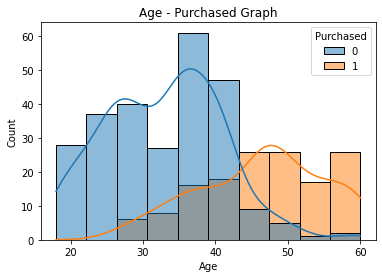

In [ ]:
sns.histplot(x='Age', data  = df, hue = 'Purchased', kde =True)
plt.title("Age - Purchased Graph")
plt.show()

From the graph it is visible that, elder people generally make purchases and younger people do not.

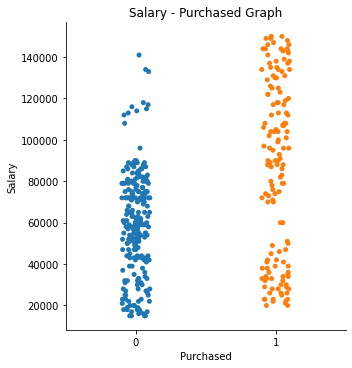

In [ ]:
sns.catplot(y='EstimatedSalary', x = 'Purchased' , data = df)
plt.ylabel("Salary")
plt.title("Salary - Purchased Graph")
plt.show()

From this graph we can see that, lower salaried induviduals generally do not buy Ads.

## Building our Model
We use Sklearn to split our data into Training and Test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

### Normalizing Features
If the values of features are between 0 and 1 they become easy for the model to learn. So we preprocess our data.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

### Fitting our Model

In [ ]:
#Fittting Logistic Regression to our Dataset
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Predicting on the Test Set

In [ ]:
#Predicting new results
y_pred = classifier.predict(X_test)

## Checking our Model's Accuracy
We use accuracy_score from Sklearn to get out model's accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
print(f'So the Accuracy of our model is: {accuracy*100} % .')

So the Accuracy of our model is: 91.25 % .


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[56  2]
 [ 5 17]]


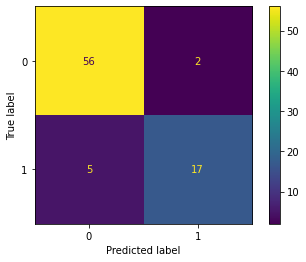

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()  